In [1]:
from bs4 import BeautifulSoup, Tag
import pandas as pd
import re
import matplotlib.pyplot as plt
root_path = "/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Module IAS/Master's Thesis/gutenberg-edition16/info/texte/lesetips.html"

with open(root_path, "r", encoding="ISO-8859-1") as f:
    soup = BeautifulSoup(f, features="lxml")

In [2]:
def non_image_link(tag: Tag) -> bool:
    return tag.name == "a" and tag.get("href", "").endswith(".html") and tag.find_all("img") == []

In [3]:
fiction_stats = []
fiction_genre_list = soup.find("p", string="Belletristik").find_next_sibling("dl")
fiction_genres = fiction_genre_list.find_all("a")
for genre in fiction_genres:
    anchor_id = genre["href"].split("#")[-1]
    book_list = soup.find("a", id=anchor_id).parent.find_next_sibling("dl")
    book_count = len(book_list.find_all(non_image_link))
    fiction_stats.append({"genre": re.sub(r"\s+", " ", genre.text), "count": book_count})
fiction_df = pd.DataFrame(fiction_stats)
fiction_df.head()


,genre,count
0,"Romane, Novellen und Erzählungen",5556
1,Historische Romane und Erzählungen,338
2,Anthologien,18
3,"Märchen, Sagen, Legenden",349
4,Romanhafte Biographien,75


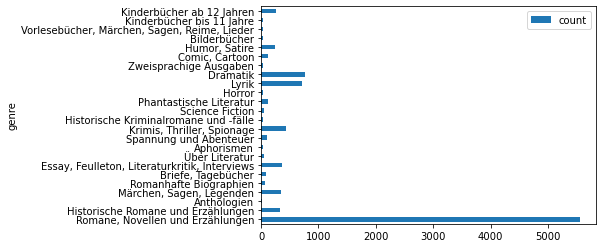

In [4]:
fiction_df.index = fiction_df["genre"]
fiction_df.plot(kind="barh")
plt.show()

In [5]:
nonfiction_stats = []
nonfiction_genre_list = soup.find("p", string="Sachbuch").find_next_sibling("dl")
nonfiction_genres = nonfiction_genre_list.find_all("a")
for genre in nonfiction_genres:
    anchor_id = genre["href"].split("#")[-1]
    book_list = soup.find("a", id=anchor_id).parent.find_next_sibling("dl")
    book_count = len(book_list.find_all(non_image_link))
    nonfiction_stats.append({"genre": re.sub(r"\s+", " ", genre.text), "count": book_count})
nonfiction_df = pd.DataFrame(nonfiction_stats)
nonfiction_df.head()

,genre,count
0,Deutschland,45
1,Europa,73
2,Afrika,20
3,Naher Osten,18
4,Asien,29


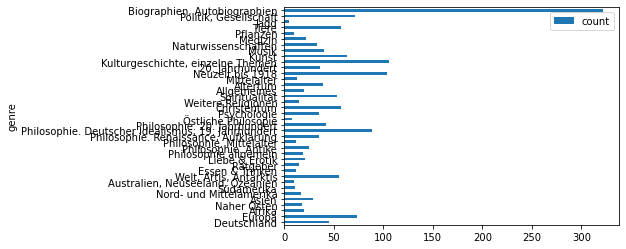

In [6]:
nonfiction_df.index = nonfiction_df["genre"]
nonfiction_df.plot(kind="barh")
plt.show()

In [7]:
print("Total fiction: ", fiction_df["count"].sum())
print("Total nonfiction: ", nonfiction_df["count"].sum())

Total fiction:  9884
Total nonfiction:  1657


In [8]:
genre_list = [
    "Romane, Novellen und Erzählungen",
    "Historische Romane und Erzählungen",
    "Anthologien",
    "Romanhafte Biographien",
    "Märchen, Sagen, Legenden",
    "Spannung und Abenteuer",
    "Krimis, Thriller, Spionage",
    "Historische Kriminalromane und -fälle",
    "Science Fiction",
    "Phantastische Literatur",
    "Horror",
    "Humor, Satire",
    "Kinderbücher bis 11 Jahre",
    "Kinderbücher ab 12 Jahren",
]
allowed_fiction_df = fiction_df.query("genre in @genre_list")
removed_fiction_df = fiction_df.query("genre not in @genre_list")
print(allowed_fiction_df["count"].sum())
print(removed_fiction_df["count"].sum())
removed_fiction_df.sort_values(by="count", ascending=False).head()

7654
2230


,genre,count
genre,,
Dramatik,Dramatik,773
Lyrik,Lyrik,708
"Essay, Feulleton, Literaturkritik, Interviews","Essay, Feulleton, Literaturkritik, Interviews",368
"Comic, Cartoon","Comic, Cartoon",112
"Briefe, Tagebücher","Briefe, Tagebücher",84


In [9]:
print(allowed_fiction_df)

                                                                       genre  \
genre                                                                          
Romane, Novellen und Erzählungen            Romane, Novellen und Erzählungen   
Historische Romane und Erzählungen        Historische Romane und Erzählungen   
Anthologien                                                      Anthologien   
Märchen, Sagen, Legenden                            Märchen, Sagen, Legenden   
Romanhafte Biographien                                Romanhafte Biographien   
Spannung und Abenteuer                                Spannung und Abenteuer   
Krimis, Thriller, Spionage                        Krimis, Thriller, Spionage   
Historische Kriminalromane und -fälle  Historische Kriminalromane und -fälle   
Science Fiction                                              Science Fiction   
Phantastische Literatur                              Phantastische Literatur   
Horror                                  

In [10]:
print(removed_fiction_df)

                                                                                       genre  \
genre                                                                                          
Briefe, Tagebücher                                                        Briefe, Tagebücher   
Essay, Feulleton, Literaturkritik, Interviews  Essay, Feulleton, Literaturkritik, Interviews   
Über Literatur                                                                Über Literatur   
Aphorismen                                                                        Aphorismen   
Lyrik                                                                                  Lyrik   
Dramatik                                                                            Dramatik   
Zweisprachige Ausgaben                                                Zweisprachige Ausgaben   
Comic, Cartoon                                                                Comic, Cartoon   
Bilderbücher                            

In [11]:
# genre counts according to this notebook | parse script:
# Romane, Novellen und Erzählungen        5556  5555
# Historische Romane und Erzählungen       338  338
# Anthologien                               18  18
# Märchen, Sagen, Legenden                 349  349
# Romanhafte Biographien                    75  75
# Spannung und Abenteuer                   111  111
# Krimis, Thriller, Spionage               433  433
# Historische Kriminalromane und -fälle     25  25
# Science Fiction                           57  57
# Phantastische Literatur                  118  118
# Horror                                    37  37
# Humor, Satire                            239  239
# Kinderbücher bis 11 Jahre                 40  40
# Kinderbücher ab 12 Jahren                258  258

In [12]:
list = [
0,
5555,
5893,
5911,
6260,
6335,
6446,
6879,
6904,
6961,
7079,
7116,
7355,
7395,
7653]
for idx, e in enumerate(list):
    if idx == 0:
        print( e)
    else:
        print( e - list[idx - 1])

0
5555
338
18
349
75
111
433
25
57
118
37
239
40
258
